In [82]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

In [62]:
url = 'https://randomstreetview.com/data'

In [63]:
all_locs = []
for _ in range(100):
  r = requests.post(url, data={'country':'no'}, files=[])
  all_locs.extend(r.json()['locations'])


In [110]:
df = pd.DataFrame(all_locs)
df = df.drop('formatted_address', axis=1)
df = df.drop_duplicates()
df['lat'] = pd.to_numeric(df['lat'])
df['lng'] = pd.to_numeric(df['lng'])
df = df.drop(df[df['lng'] < -5].index)
df = df.drop(df[df['lng'] > 45].index)
df = df.drop(df[(df['lng'] > 16) & (df['lat'] < 68 )].index)
df.to_json('data/locations.json', orient='records')

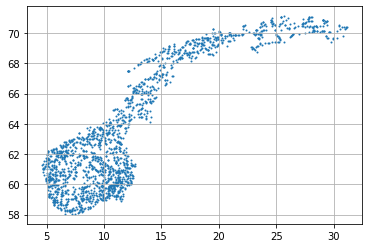

In [136]:
df_plt = df.sample(frac=1)
fig = plt.figure()
fig.set_facecolor('white')
plt.scatter(df_plt['lng'], df_plt['lat'], s=1)
plt.grid()